<a href="https://colab.research.google.com/github/victorezealuma/Stock_Portfolio_Optimization/blob/main/Portfolio_Opt_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The goal of this project is to optimize a porfolio of stocks using Efficient Frontier

In [2]:
# Geting some information from yahoo finance
!pip install yfinance

In [3]:
# Importing python Libraries
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('_classic_test_patch')

In [5]:
# Getting required data from yahoo finance

tickers = ("BA,CMT,CMCSA,CRM,CVX")

df = yf.download(tickers, period= '5y')['Adj Close']
df

[*********************100%%**********************]  5 of 5 completed


Ticker,BA,CMCSA,CMT,CRM,CVX
Date,,,,,
2019-03-26,361.705139,35.269627,7.250000,159.192047,99.536552
2019-03-27,365.445435,35.785812,7.300000,154.917633,98.462036
2019-03-28,365.670013,35.972698,7.420000,154.977554,98.646477
2019-03-29,372.486572,35.581108,7.380000,158.163391,98.774773
2019-04-01,382.369537,35.874802,7.320000,160.969727,100.186081
...,...,...,...,...,...
2024-03-19,181.139999,42.990002,18.670000,301.450012,156.619995
2024-03-20,187.779999,43.099998,19.510000,306.079987,154.550003
2024-03-21,187.699997,42.889999,19.860001,308.390015,154.860001


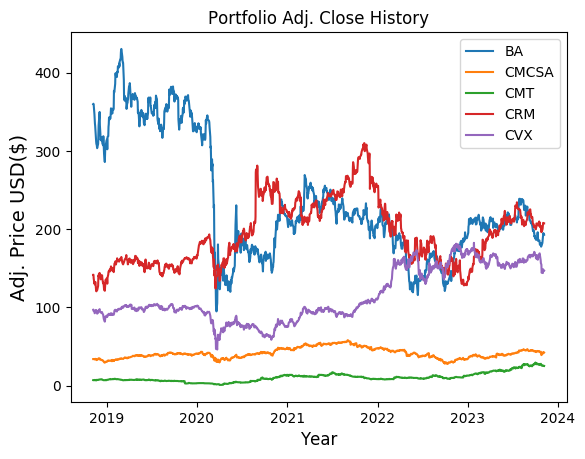

In [ ]:
# Visual for the stock/Portfolio

title = 'Portfolio Adj. Close History'

stocks = df

for c in stocks.columns.values:
  plt.plot(stocks[c], label = c)

plt.title(title)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Adj. Price USD($)', fontsize = 14)
plt.legend(stocks.columns.values, loc = 'upper right')
plt.show()

In [ ]:
# Daily simple return of ur portfolio

DSR = df.pct_change()
DSR

,BA,CMCSA,CMT,CRM,CVX
Date,,,,,
2018-11-07,NaN,NaN,NaN,NaN,NaN
2018-11-08,0.001242,0.000000,-0.011173,0.000564,-0.012493
2018-11-09,-0.003857,0.001044,0.018362,-0.034891,0.001257
2018-11-12,-0.033330,-0.008868,-0.012483,-0.046889,-0.017739
2018-11-13,-0.021063,-0.007368,0.025281,0.012720,-0.017378
...,...,...,...,...,...
2023-10-31,0.024513,0.020766,-0.010062,0.007829,-0.002464
2023-11-01,0.013703,0.012836,-0.006646,0.015336,-0.012009
2023-11-02,0.013887,0.016260,-0.009445,0.020597,0.033199


In [ ]:
# Creating annualized covariance matrix(The covariance is the directional reationship between assest prices)
annual_cov_matrix = DSR.cov() * 252
annual_cov_matrix

,BA,CMCSA,CMT,CRM,CVX
BA,0.257308,0.059491,0.086513,0.071733,0.097437
CMCSA,0.059491,0.078501,0.022426,0.045819,0.041431
CMT,0.086513,0.022426,0.533278,0.038654,0.044876
CRM,0.071733,0.045819,0.038654,0.153201,0.042202
CVX,0.097437,0.041431,0.044876,0.042202,0.127856


In [ ]:
# Portfolio Variance - PV=Portfolio Variance

weights = np.array([0.2, 0.2, 0.2, 0.2, 0.2])

PV = np.dot(weights.transpose(), np.dot(annual_cov_matrix, weights))

PV


0.0900523383269231

In [ ]:
# To calculate portfolio Volatitlity(Standard Deviation)

Port_Vol = np.sqrt(PV)
Port_Vol

0.3000872178666114

In [ ]:
# To get our Annual Portfolio Return - DSR='Daily Simple Return', PAR='Portfolio Annual Return'

PAR = np.sum(DSR.mean() * weights) * 252
PAR

0.1788861952507051

In [ ]:
# Shows expected annual return, volatitlity(aka. risk or standard deviation) & variance

percentage_return = str(round(PAR, 2) * 100) + '%'
Percentage_volatility = str(round(Port_Vol, 2) * 100) + '%'
Percentage_variance = str(round(PV, 2) * 100) + '%'


print('Expected Annual Return: ' + percentage_return)
print('Annual Volatility/Risk: ' + Percentage_volatility)
print('Annual Variance: ' + Percentage_variance)

Expected Annual Return: 18.0%
Annual Volatility/Risk: 30.0%
Annual Variance: 9.0%


In [ ]:
pip install pyportfolioOpt

In [ ]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [ ]:

# Lets now get our Optimized Portfolio using Efficient Frontier

# Calculating for expected returns and annualized sample covariance matrix of asset returns
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

#Optimize for Max_Sharpe_Ratio

ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose = True)

OrderedDict([('BA', 0.0), ('CMCSA', 0.0), ('CMT', 0.48985), ('CRM', 0.19752), ('CVX', 0.31263)])
Expected annual return: 18.4%
Annual volatility: 41.6%
Sharpe Ratio: 0.40


(0.1843447063327149, 0.41578030900971114, 0.3952681326447242)

In [ ]:
0.48985 + 0.19752 + 0.31263

1.0